In [16]:
import math

from scipy.io import wavfile
from scipy.signal import savgol_filter
from scipy.ndimage import zoom
import numpy as np

import matplotlib.pyplot as plt

DURATION = 30

96000 2880000


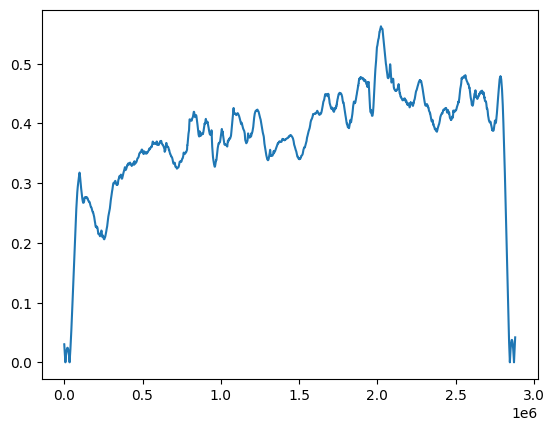

In [19]:
def normalize_means(means):
    _min, _max = min(means), max(means)
    normed_means = [(m-_min)/(_max-_min) for m in means]
    for i in range(1+(len(normed_means)//50)):
        normed_means[i] = 0
        normed_means[-i] = 0
    filtered = savgol_filter(normed_means, len(means)//20, 5)
    filtered = zoom(filtered, AUDIO_LENGTH/len(filtered))
    return np.absolute(filtered)

samplerate, audio = wavfile.read('sounds/tibetan_A#2.wav')
AUDIO_LENGTH = samplerate*DURATION
cut_audio = audio[:AUDIO_LENGTH]
print(samplerate, AUDIO_LENGTH)

means_raw = np.genfromtxt('outputs/mosaics_means_3681.csv', delimiter=',')
#print(normalize_means(means))
means = normalize_means(means_raw)
plt.plot(means)

bass = np.array([[means[i]*_pair[0], means[i]*_pair[1]] for i, _pair in enumerate(cut_audio)])
wavfile.write("sounds/deep_hubble/bass_A#2.wav", samplerate, bass.astype(np.int16))